## Desafío - Clasificación desde Machine Learning



* Para poder realziar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip


Descripción
En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
* default : Variable binaria. Registra si el cliente entró en morosidad o no.
* income : Ingreso promedio declarado por el cliente.
* balance : Total de saldo en la cuenta de crédito (deuda).
* student : Variable binaria. Registra si el cliente es estudiante o no

### Desafío 1: Preparación del ambiente de trabajo

* Importe los módulos básicos para el análisis de datos
* Importe seaborn .
* Importe statsmodels
* Importe LogisticRegression , train_test_split , StandardScaler , classification_report y roc_curve de sklearn
* Importe el archivo default_credit.csv

In [1]:
# importación de las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# Librerías de sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



plt.style.use('seaborn')
# Gráficos estilo seaborn
# plt.rcParams["figure.figsize"] = (6, 3) # Tamaño gráficos
# plt.rcParams["figure.dpi"] = 200 # resolución gráficos


In [2]:
df=pd.read_csv('default_credit.csv').drop("index", axis=1) #limpieza del index

df.head()


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### Desafío 2: Análisis exploratorio
* Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos.
    * Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
    * Un boxplot del balance total de las cuentas, segmentado por el status de default.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
    * Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.
    * Un diagrama de dispersión entre balance e income , segmentado por el status de default.
* Comente brevemente sobre los principales patrones de comportamiento.
* tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por status.

### Estadísticos descriptivos

In [3]:
# Iteración para obtener los estadísticos descriptivos para las variables numéricas y categóricas

for i in df:
    if len(df[i].value_counts()) > 2:
        print(df[i].describe(), "\n")
    else:
        print(df[i].value_counts('%'), "\n")

No     0.9667
Yes    0.0333
Name: default, dtype: float64 

No     0.7056
Yes    0.2944
Name: student, dtype: float64 

count    10000.000000
mean       835.374886
std        483.714985
min          0.000000
25%        481.731105
50%        823.636973
75%       1166.308386
max       2654.322576
Name: balance, dtype: float64 

count    10000.000000
mean     33516.981876
std      13336.639563
min        771.967729
25%      21340.462903
50%      34552.644802
75%      43807.729272
max      73554.233495
Name: income, dtype: float64 



* Podemos apreciar que la variable categórica 'default' tiene una sobrerepresentación del valor 'no', con un 97% apróximado; la variable categórica 'student' también esta inclinada al valor 'no' con una representacion del 71 % aproximadamente; la variable numérica 'balance' tiene una media de 835, pero una desviación estandar elevada de 484 unidades (1/2 de la media), esto nos sugiere inmediatamente que los valores presentan una gran dispersión;finalmente, la variable numérica 'income' tiene una media de 33517 y una desviación estandar de 13337 (1/3 de la media), lo que nos sugiere que los valores están dispersos.

### Gráficos descriptivos

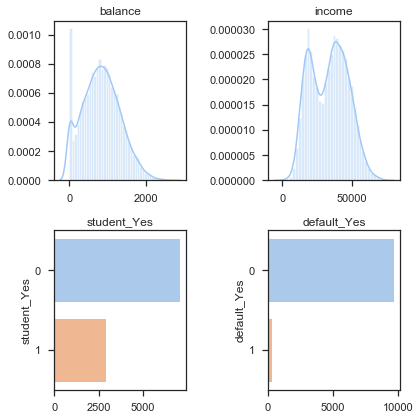

In [48]:
# Gráficos descriptivos

for n, i in enumerate(df):
    plt.subplot(2, 2, n+1)
    
    if len(df[i].value_counts()) > 2:
        sns.distplot(df[i])
        plt.title(i)
        plt.xlabel("")
    else:
        sns.countplot(y=df[i])
        plt.title(i)
        plt.xlabel("")
    plt.rcParams["figure.figsize"] = (6, 6) 
    plt.tight_layout()
       

- Se puede apreciar lo descrito anteriormente en los gráficos descriptivos, los histogramas muestran que 'balance' tiene un sesgo al principio de la distribución, está 'outliers', podría deberse a una anomalía o talvez a un patrón, pero en general tiene una vaga aproximación a la distribución normal. Para el caso de 'income', se pueden ver dos cimas, dos grandes grupos de valores, cercanos al centro de la distrubición, que concentran los valores. Los demás gráficos representan las frecuencias de los valores si/no de las variables Student y Default

### Gráficos boxplot

1. Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.

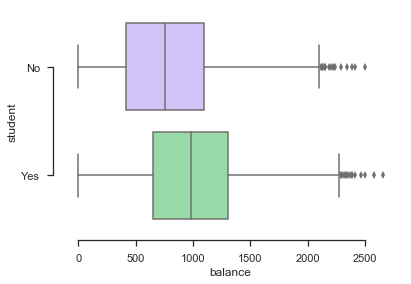

In [5]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="balance", y="student",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim= True)

- Se puede apreciar que los estudiantes tienen un balance ligeramente mayor que aquellos que no son estudiantes, pero a su vez presentan una mayor dispersión. 

2. Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.

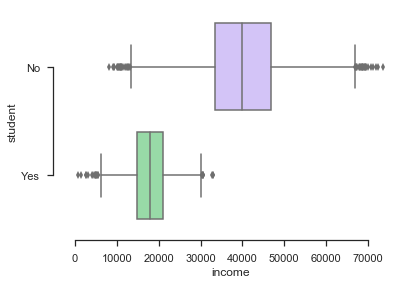

In [6]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="income", y="student",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim= True)

- Se puede apreciar que los no estudiantes tienen un ingreso mucho mayor que aquellos queson estudiantes, pero a su vez presentan una mayor dispersión, lo cuál es sensato ya que los estudiantes no pueden dedicar su tiempo completamente a generar ingresos. 

3. Un boxplot del balance total de las cuentas, segmentado por el status de default.

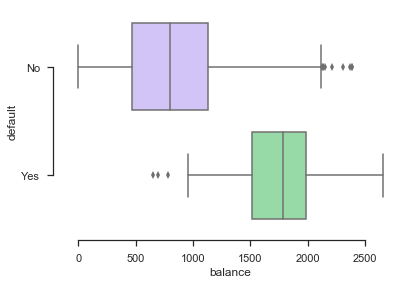

In [7]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="balance", y="default",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim= True)

- Se puede apreciar que aquellos en status 'default' tienen un balance mayor que aquellos que no están en 'default', y su   dispersión es un poco menor y mejor distribuída. 

4. Un boxplot del ingreso total de cada cliente, segmentado por el status de default.

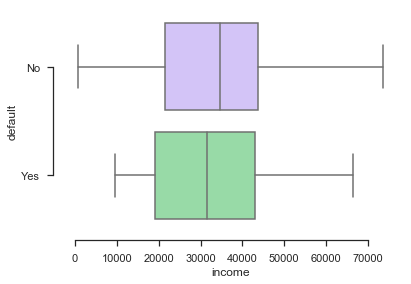

In [8]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="income", y="default",
             palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim= True)

- Se puede apreciar que los ingresos son similares para ambos grupos, talvez aquellos que no pertenecen a la categoría 'default', presenten un nivel de ingresos ligeramente superior, sin embargo la dispersión es mayor en aquellos que no están en default.

5.Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.


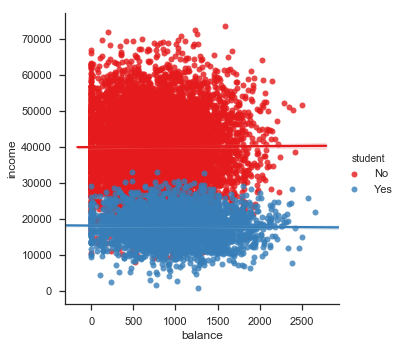

In [9]:
sns.lmplot(x="balance", y="income", hue="student", data=df,
              palette="Set1")

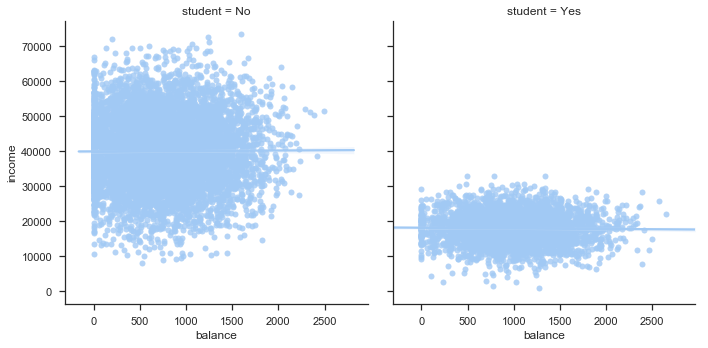

In [10]:
sns.lmplot(x="balance", y="income", col="student", data=df)

In [56]:
df.corr()['balance'] # correlaciones de Pearson entre balance - income

balance        1.000000
income        -0.152243
student_Yes    0.203578
default_Yes    0.350119
Name: balance, dtype: float64

- La correlación entre los ingresos y el balance es ligeramente negativa en el caso de los estudiantes, si bien la pendiente es muy similar para ambos grupos, el intercepto es mayor para aquellos que no son estudiantes, ésto debido a que perciben mayores ingresos, para corroborar aquello el r de Pearson arroja un valor de -0.15 aprox. lo que sugiere una correlación negativa muy baja 

6.Un diagrama de dispersión entre balance e income , segmentado por el status de default.

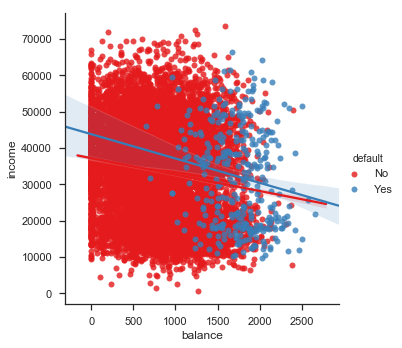

In [11]:
sns.lmplot(x="balance", y="income", hue="default", data=df,
              palette="Set1")

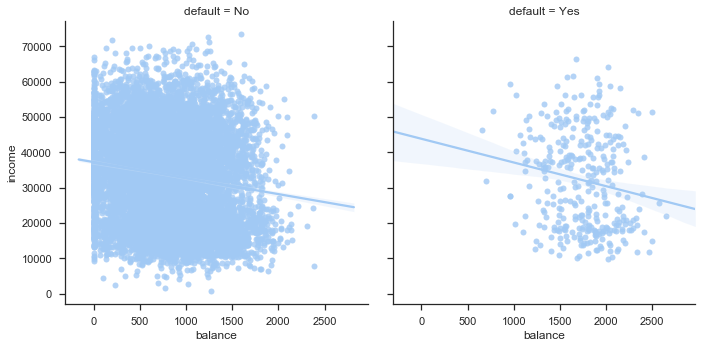

In [12]:
sns.lmplot(x="balance", y="income", col="default", data=df)

- A diferencia del caso anterior, en el caso del 'default' se aprecian que la tendencia es negativa, es decir a medida que se incrementa el balance, tiende a disminuir de forma aparentemente lineal los ingresos. La pendiente es un poco más acentuada para el caso de aquellos que si presentan 'default', pero a su vez la cantidad de observaciones es menor, por lo que podría ser un efecto del muestreo y no un patrón estadístico. 

### Desafío 3: Modelación econométrica
Recodifique las variables student y default para que adquieran atributos numéricos.
Implemente el siguiente modelo econométrico:


$$\log\left(\frac{p({default=1})}{1 - p({default=1})}\right)={{\beta }_{0} + {\beta }_{1} \cdot {balance} +{\beta }_{2} \cdot {income}+{\beta }_{3} \cdot {student} }$$


A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [13]:
# Recodificación de variables a Dummies


student_dummies=pd.get_dummies(df.student, prefix='student', drop_first= True)
df=pd.concat([df,student_dummies], axis=1)
df.drop('student', axis=1, inplace=True) # Eliminamos la columna original

default_dummies=pd.get_dummies(df.default, prefix='default', drop_first= True)
df=pd.concat([df,default_dummies], axis=1)
df.drop('default', axis=1, inplace=True) # Eliminamos la columna original

In [14]:
# Aplicación del Modelo

variables= list(df.columns)
variables.remove('default_Yes') # Para evitar un error de colinealidad removemos la variable dependiente de la lista
var=' + '.join(variables)
m1_logit = smf.logit('default_Yes ~ '+ var, df).fit()
m1_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default_Yes      AIC:              1579.5448  
Date:               2019-07-24 14:44 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept       -10.8690   0.4923 -22.0793 0.0000 -11.8339 -9.9042
balance           0.0057   0.0002  24.7365 0.0000   0.0053  0.0062
income            0.0000   0.0000   0.3698 0.7115  -0.0000  0.0000
student_Yes      -0.6468   0.2363  -2.7376 0.0062  -1.1098 -0.1837
==================================================================

"""

* Se puede apreciar que 'income' no es significativa para el modelo

In [15]:
# Depuración del Modelo
# Extraemos las variables estadísticamente significatias

pvalues = m1_logit.pvalues
print ('Las siguientes variables son estadísticamente significativas: ')        
means_values= pd.Series(pvalues).where(lambda x : x<0.025).dropna() 
print(means_values)

Las siguientes variables son estadísticamente significativas: 
Intercept      4.995499e-108
balance        4.331521e-135
student_Yes     6.189022e-03
dtype: float64


In [16]:
# generamos un modelo depurado con las variables estadísticamente significativas

variables= list(means_values.index)
variables.remove('Intercept') # Removemos el Intercepto
var=' + '.join(variables)
m2_logit = smf.logit('default_Yes ~ '+ var, df).fit()
m2_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: default_Yes      AIC:              1577.6816  
Date:               2019-07-24 14:44 BIC:              1599.3126  
No. Observations:   10000            Log-Likelihood:   -785.84    
Df Model:           2                LL-Null:          -1460.3    
Df Residuals:       9997             LLR p-value:      1.1893e-293
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
Intercept      -10.7495   0.3692 -29.1149 0.0000 -11.4731 -10.0259
balance          0.0057   0.0002  24.7485 0.0000   0.0053   0.0062
student_Yes     -0.7149   0.1475  -4.8459 0.0000  -1.0040  -0.4257
==================================================================

"""

* Una interpretación general de este modelo es que la principal variable que afecta la probabilidad de morosidad ('default'), es el hecho de ser estudiante, es decir aquellos que son estudianes tienen una mayor probabilidad de ser morosos. 

### Desafío 4: Entrenar
A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
* Estandarize la matriz de atributos.
* Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
*  Implemente el modelo sin alterar los hiperparámetros.
*  Genere la predicción de las clases y de la probabilidad.
*  Reporte las métricas de precision, recall y f1 para ambas clases.
*  Grafique la curva Receiver Operator Characteristic.

En base a los pasos, comente sobre el desempeño predictivo del modelo.

1. Estandarize la matriz de atributos 

In [57]:
atributos = ["balance","student_Yes"]  #matriz de atributos
target = ["default_Yes"]    #vector objetivo


scalar_model = StandardScaler().fit(df.loc[:,atributos])  #parametros para escalar las variables y estandarizarlas
X = scalar_model.transform(df.loc[:,atributos]) 



2. Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   df.loc[:,target],
                                                   test_size = .33,
                                                   random_state=11238)

3. Implemente el modelo sin alterar los hiperparámetros.

In [19]:
default_model = LogisticRegression().fit(X_train, y_train)

In [20]:
default_model.coef_

array([[ 2.56143656, -0.34815408]])

In [21]:
default_model.intercept_


array([-5.79596441])

- Debido al escalamiento de las variables, nuestro modelo entrenado, tiene un intercepto y coeficientes diferentes al modelo estadístico (econométrico) del desafío anterior.

4. Genere la predicción de las clases y de la probabilidad

In [70]:
# Predicciones de Clase

y_pred = default_model.predict(X_test)
# solicitemos las primeras 10 observaciones del vector predicho.
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [74]:
df['default_Yes'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: default_Yes, dtype: uint8

- El modelo nos arroja la clasificación (predicción de clase) para las  10 primeras observaciones, al compararse con las observaciones del data set original, nos podemos dar cuenta que el modelo es bastante preciso para clasificar aquellos individuos que no son morosos, puesto que tiene un 90 % de acierto en las 10 primeras observaciones

In [64]:
# Predicciones de Probabilidad

y_pred_prob = default_model.predict_proba(X_test).round(3)
y_pred_prob[:10]

array([[1.   , 0.   ],
       [0.998, 0.002],
       [1.   , 0.   ],
       [0.432, 0.568],
       [0.999, 0.001],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.993, 0.007],
       [1.   , 0.   ],
       [1.   , 0.   ]])

* Aquí se muestran los valores de probabilidad asignados a cada clase, en el caso 4 que arroja un falso positivo, el modelo falla por un poco margen (0.56).

5. Reporte las métricas de precision, recall y f1 para ambas clases.

In [79]:
# matriz de confusión

m_confusion = confusion_matrix(y_test, y_pred)
m_confusion



array([[3174,   12],
       [  77,   37]], dtype=int64)

- La matriz de confusión nos informa las 4 categorías posibles: verdadero negativo, falso negativo, verdadero positivo, falso positivo; si observamos la mayor cantidad de observaciones se registraron como "verdaderas negativas", ésto se debe a que el modelo inicialmente tenía una mayor cantidad de casos de personas no-morosas (97 %).

In [25]:
# Precisión del modelo
precision_score(y_test, y_pred)


0.7551020408163265

- La precisión del modelo se obtiene al ponderar los verdaderos positivos con los verdaderos negativos, por el total de valores predichos, podemos observar un nivel de concordancia del 0.76 lo que indica que el modelo tiene una precisión bastante aceptable. 

In [26]:
# resumen de las métricas

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3186
           1       0.76      0.32      0.45       114

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.87      0.66      0.72      3300
weighted avg       0.97      0.97      0.97      3300



- Las métricas del modelo reportan lo siguiente:

  - Precisión es la manera en que el modelo predice exitosamente los casos verdaderos , en este caso vemos que para el caso de los verdaderos negativos tiene una precisión excelente del 98%, para el caso de los verdaderos positivos la precisión cae a un 76 %
  - Recall es una medida de sensibilidad del modelo que mide la fracción de verdaderos predichos por el modelo. Es decir, si logra predecir aquellos resultados que son relevantes. En éste modelo se observa que el recall para los verdaderos negativos es 1.00 lo que significa que el modelo es capaz de predecir completamente aquellos resultados que resultan ser relevantes, sin embargo para los verdaderos positivos el recall es de sólo 32%, lo que indica que el modelo no tiene un buen desempeño para clasificar los verdaderos positivos.
  - F1-score: es una medida ponderada de ambas métricas anteriores, para el caso de los verdadero negativos el f1- score es excelente, lo que indica que el modelo clasifica muy bien a los individuos que no son morosos, sin embargo para el caso de los individuos morosos el f1- score decae a 0.45 lo que indica que el modelo tiene un desempeño mediocre en estos casos. 
  - Las divergencias entre los verdaderos negativos y positivos, se pueden justificar a partir del número de casos de entrenamiento y test, para el caso de los verdaderos negativos se tuvieron 3186 registros y para los verdaderos positivos solamente 114 casos, esto explica el sesgo del modelo.
  
 


6. Grafique la curva Receiver Operator Characteristic.

In [27]:
# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
yhat = default_model.predict_proba(X_test)[:, 1]
# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat)

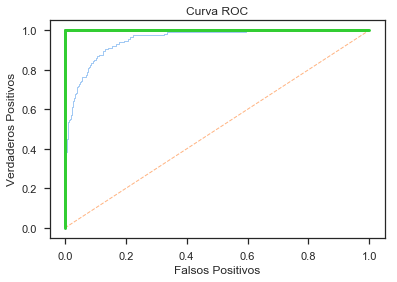

In [28]:
# Gráfica curva ROC
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [29]:
# COEFICIENTE DE DESEMPEÑO ROC DEL MODELO

roc_auc_score(y_test, yhat)

0.9532053611744364

- La Curva ROC muestra el desempeño del modelo frente a la probabilidad de clasificación aleatoria (línea roja; 0.5), se aprecia claramente que el modelo tiene un altisimo desempeño (curva azul), siendo la cercana a la curva teórica de clasificación perfecta (curva verde), el coeficiente de desempeño es 0.95, lo que indica la alta precisión del modelo. Sin embargo, al estar desbalanceada la proporción de verdaderos negativos y verdaderos positivos, el modelo podría estar sobreestimando (overfitting) aquellos casos que no son verdaderos negativos y subestimando (underfitting) los casos que si son verdaderos positivos, solucionar este problema implica reformular el diseño del estudio o la modelación, pudiendo emplearse técnicas de resampling, para disminuir estas divergencias.